In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [108]:
cars = pd.read_csv('Cars93.csv')

In [109]:
cars = cars.dropna()

In [110]:
cars = cars.drop('Unnamed: 0', axis=1)

In [111]:
cars = cars.drop(columns=['Manufacturer', 'Model', 'Make'])

In [112]:
y = cars[['MPG.highway']].copy()

In [113]:
X = cars.drop('MPG.highway', axis=1).copy()

In [114]:
X = pd.get_dummies(X)

In [115]:
X.columns

Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'EngineSize',
       'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers',
       'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
       'Luggage.room', 'Weight', 'Type_Compact', 'Type_Large', 'Type_Midsize',
       'Type_Small', 'Type_Sporty', 'AirBags_Driver & Passenger',
       'AirBags_Driver only', 'AirBags_None', 'DriveTrain_4WD',
       'DriveTrain_Front', 'DriveTrain_Rear', 'Cylinders_3', 'Cylinders_4',
       'Cylinders_5', 'Cylinders_6', 'Cylinders_8', 'Man.trans.avail_No',
       'Man.trans.avail_Yes', 'Origin_USA', 'Origin_non-USA'],
      dtype='object')

In [116]:
X = X.drop(columns=['Type_Compact', 'AirBags_None', 'DriveTrain_Rear', 'Cylinders_3', 'Man.trans.avail_No', 'Origin_non-USA'])

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [118]:
reg = LinearRegression().fit(X_train, y_train)
predict = reg.predict(X_test)
predict = predict.reshape(-1)

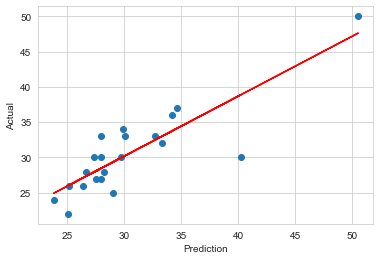

In [119]:
sns.set_style('whitegrid')

plt.scatter(x= predict, y= y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')


m, b = np.polyfit(predict, y_test, 1)

plt.plot(predict, m*predict+b, color='red')

In [120]:
reg.score(X_test, y_test)

0.7080027934396278

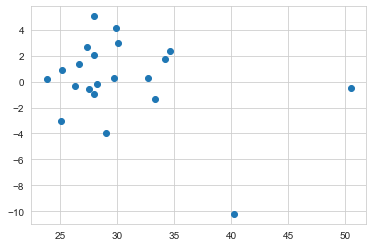

In [121]:
y_test = y_test.reset_index()
y = y_test['MPG.highway']
g = y.sub(predict)
x = predict

sns.set_style('whitegrid')

plt.scatter(x= predict, y = g)
